In [125]:
# Main libraries for data processing and visalization
import numpy as np
import pandas as pd
from datetime import datetime
import os, sys  
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
from sqlalchemy import create_engine

# Tools from Tensorflow and Scikitlearn for machine learning modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, MaxPooling1D, Conv1D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Libraries for saving sklearn models
import pickle
import joblib

# Importing tools from statsmodels for TimeSeries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

Let´s first move the folder one step upwards so that we can import our own functions

In [2]:
route = os.getcwd()
new_route = os.path.dirname(route)
sys.path.append(route)

In [163]:
# Importing our own functions designed for this project
from utils.mining_data_tb import merge_csv
from utils.mining_data_tb import save_merged_csv
from utils.mining_data_tb import add_features
from utils.mining_data_tb import parser
from utils.models import build_simple_rnn
from utils.models import LSTM_preprocessing
from utils.models import ad_test
from utils.models import Time_Series_train_test_split
from utils.models import build_simple_rnn
from utils.models import build_CNN_model
from utils.models import try_embedding
from utils.models import try_epochs
from utils.models import try_batch
from utils import sql_tb as sql
from utils.apis_tb import read_json


ImportError: cannot import name 'parser' from 'utils.mining_data_tb' (c:\Users\jarai\Desktop\Python_work\TheBridge\Alumno\Javier_Araiz_TheBridge\ML_Project\src\utils\mining_data_tb.py)

The data used for this project is EUR/USD price from 2016 to may 2021. It is divided in csv files per year except from 2021 data, which is divided by month. Therefore, I am going to make use of functions stored in mining_data_tb.py to put all together in one single csv that can be read as a single dataframe


In [4]:
columns = ['Date', 'Time','Bar OPEN Bid Quote','Bar HIGH Bid Quote','Bar LOW Bid Quote','Bar CLOSE Bid Quote','Volume']
base = '../data/DAT_MT_EURUSD_M1_20'
test_path = r'C:\\Users\\jarai\\Desktop\\Python_work\\TheBridge\\Alumno\\Javier_Araiz_TheBridge\\ML_Project\\data'
first_file = 'merged_file1'

In [5]:
merge_csv(base, start_number= 15, range_number= (1, 5), column_name= columns, path= test_path, file_name= first_file )

In [6]:
base2 = '../data/DAT_MT_EURUSD_M1_20210'
second_file = 'merged_file2'

In [7]:
merge_csv(base2, start_number= 0, range_number= (1, 5), column_name= columns, file_name= second_file, path= test_path )

In [8]:
base3 ='../data/merged_file'
final_name = 'all_joined_forex'

In [9]:
csv_one = '../data/merged_file1.csv'
csv_two = '../data/merged_file2.csv'
name_of_final = 'all_together_forex'

In [10]:
save_merged_csv(csv_one, csv_two,file_name= name_of_final, path= test_path)

In [11]:

df = pd.read_csv('../data/all_together_forex.csv', parse_dates= [0], date_parser= parser)
df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume
0,2016-01-03,17:00,1.08701,1.08713,1.08701,1.08713,0
1,2016-01-03,17:01,1.08712,1.08712,1.08712,1.08712,0
2,2016-01-03,17:02,1.08708,1.08722,1.08708,1.08722,0
3,2016-01-03,17:03,1.08717,1.08723,1.08717,1.08723,0
4,2016-01-03,17:04,1.08718,1.08718,1.08711,1.08711,0
...,...,...,...,...,...,...,...
2013228,2021-05-31,19:53,1.22332,1.22332,1.22329,1.22330,0
2013229,2021-05-31,19:54,1.22330,1.22330,1.22329,1.22329,0
2013230,2021-05-31,19:55,1.22327,1.22331,1.22326,1.22330,0
2013231,2021-05-31,19:57,1.22329,1.22329,1.22329,1.22329,0


In [12]:
df = pd.read_csv('../data/all_together_forex.csv')
df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume
0,2016.01.03,17:00,1.08701,1.08713,1.08701,1.08713,0
1,2016.01.03,17:01,1.08712,1.08712,1.08712,1.08712,0
2,2016.01.03,17:02,1.08708,1.08722,1.08708,1.08722,0
3,2016.01.03,17:03,1.08717,1.08723,1.08717,1.08723,0
4,2016.01.03,17:04,1.08718,1.08718,1.08711,1.08711,0
...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22332,1.22329,1.22330,0
2013229,2021.05.31,19:54,1.22330,1.22330,1.22329,1.22329,0
2013230,2021.05.31,19:55,1.22327,1.22331,1.22326,1.22330,0
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,1.22329,0


Once all the data is joined together, I am going to apply a function to add features, such as standard and exponential moving average in different periods, which I consider will help our models predict price

In [13]:
featured_file_name = 'featured_df'

add_features(df= df, file_name= featured_file_name, path= test_path)

In [14]:
final_df = pd.read_csv('../data/featured_df.csv')
final_df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,SMA_5,SMA_20,SMA_200,EMA_20
0,2016.01.03,17:00,1.08701,1.08713,1.08701,1.08713,0,NaN,NaN,NaN,NaN
1,2016.01.03,17:01,1.08712,1.08712,1.08712,1.08712,0,NaN,NaN,NaN,NaN
2,2016.01.03,17:02,1.08708,1.08722,1.08708,1.08722,0,NaN,NaN,NaN,NaN
3,2016.01.03,17:03,1.08717,1.08723,1.08717,1.08723,0,NaN,NaN,NaN,NaN
4,2016.01.03,17:04,1.08718,1.08718,1.08711,1.08711,0,1.087162,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22332,1.22329,1.22330,0,1.223316,1.223283,1.222834,1.223276
2013229,2021.05.31,19:54,1.22330,1.22330,1.22329,1.22329,0,1.223316,1.223291,1.222838,1.223277
2013230,2021.05.31,19:55,1.22327,1.22331,1.22326,1.22330,0,1.223308,1.223304,1.222841,1.223279
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,1.22329,0,1.223302,1.223315,1.222844,1.223280


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013233 entries, 0 to 2013232
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Date                 object 
 1   Time                 object 
 2   Bar OPEN Bid Quote   float64
 3   Bar HIGH Bid Quote   float64
 4   Bar LOW Bid Quote    float64
 5   Bar CLOSE Bid Quote  float64
 6   Volume               int64  
 7   SMA_5                float64
 8   SMA_20               float64
 9   SMA_200              float64
 10  EMA_20               float64
dtypes: float64(8), int64(1), object(2)
memory usage: 169.0+ MB


In [16]:
df.isnull().sum()

Date                     0
Time                     0
Bar OPEN Bid Quote       0
Bar HIGH Bid Quote       0
Bar LOW Bid Quote        0
Bar CLOSE Bid Quote      0
Volume                   0
SMA_5                    4
SMA_20                  19
SMA_200                199
EMA_20                  19
dtype: int64

In order that a TimeSeries could work well we need that the data is statioanary. For that purpose we are making a seasonal decompose function. We can see below that it has no clear trend and seasonality, so it appears to be stationary

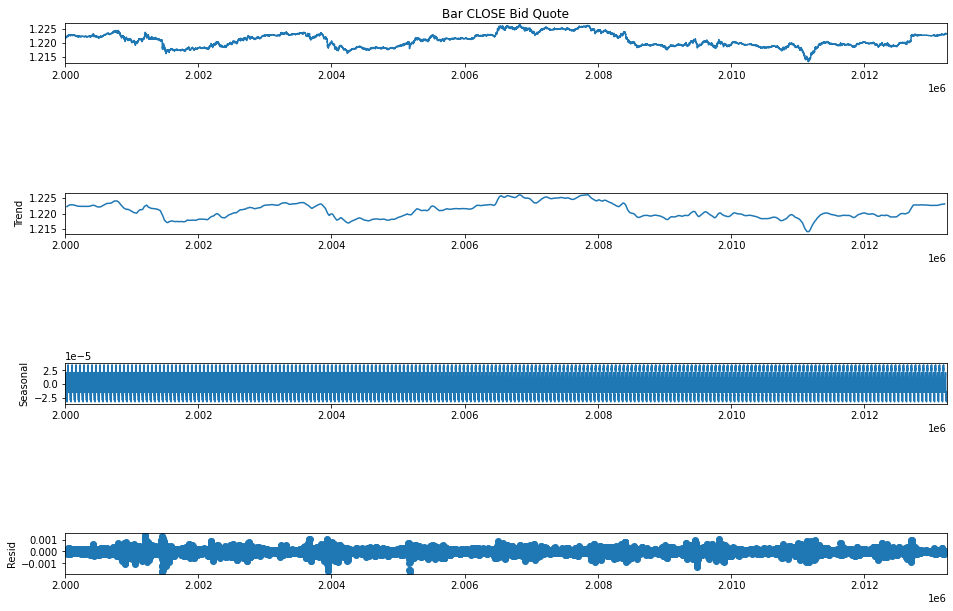

<Figure size 432x288 with 0 Axes>

In [145]:
res = sm.tsa.seasonal_decompose(df['Bar CLOSE Bid Quote'][2000000:], period= 60)
fig = res.plot()
fig.set_figheight(10)
fig.set_figwidth(15)

plt.show(fig)
plt.savefig('../resources/Images/seasonal_decompose.png')

Lineplot for the whole dataset

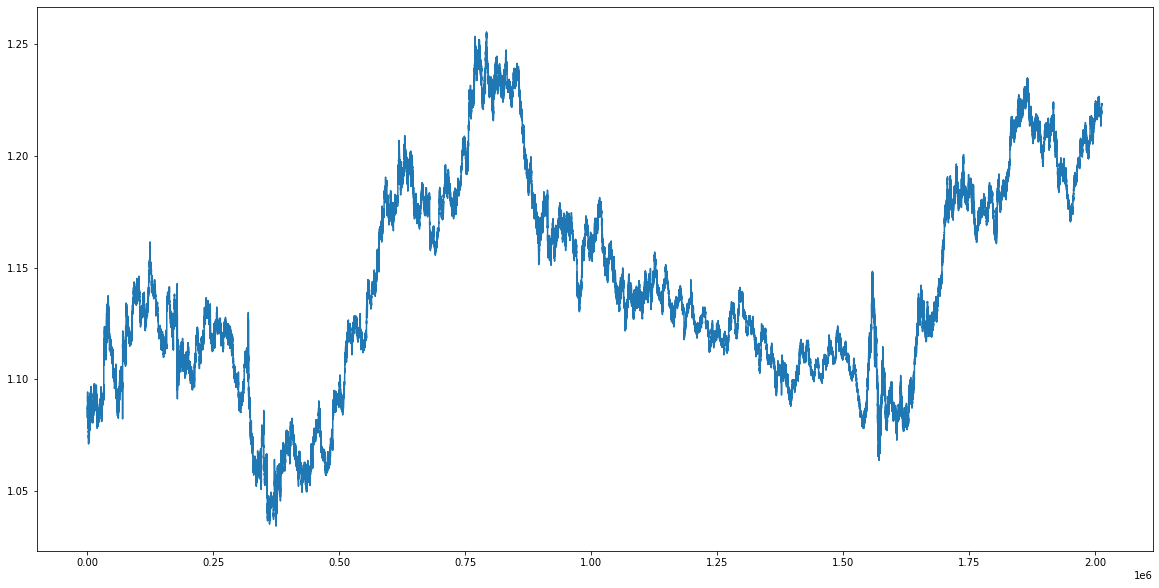

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(df['Bar CLOSE Bid Quote'])

Lineplot of the data from row 2 million. This is the data we are going to use initially for training and testing the models

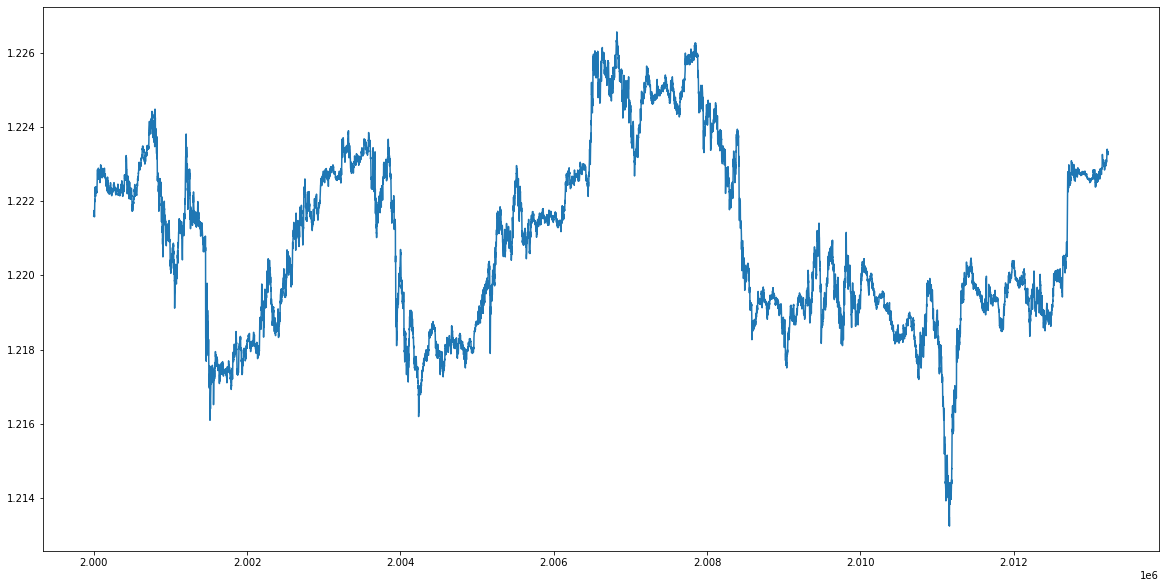

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(df['Bar CLOSE Bid Quote'][2000000:])

In [20]:
test_df = df.iloc[2000000:,:]

In [21]:
test_df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,SMA_5,SMA_20,SMA_200,EMA_20
2000000,2021.05.18,13:26,1.22160,1.22162,1.22158,1.22160,0,1.221588,1.221577,1.221098,1.221588
2000001,2021.05.18,13:27,1.22159,1.22162,1.22159,1.22160,0,1.221592,1.221577,1.221101,1.221590
2000002,2021.05.18,13:28,1.22159,1.22159,1.22158,1.22159,0,1.221594,1.221577,1.221105,1.221590
2000003,2021.05.18,13:29,1.22160,1.22163,1.22159,1.22163,0,1.221602,1.221583,1.221108,1.221593
2000004,2021.05.18,13:30,1.22168,1.22173,1.22168,1.22173,0,1.221630,1.221592,1.221113,1.221606
...,...,...,...,...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22332,1.22329,1.22330,0,1.223316,1.223283,1.222834,1.223276
2013229,2021.05.31,19:54,1.22330,1.22330,1.22329,1.22329,0,1.223316,1.223291,1.222838,1.223277
2013230,2021.05.31,19:55,1.22327,1.22331,1.22326,1.22330,0,1.223308,1.223304,1.222841,1.223279
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,1.22329,0,1.223302,1.223315,1.222844,1.223280


As per the heatmap displayed below we can see that all features have a great correlation between them

<AxesSubplot:>

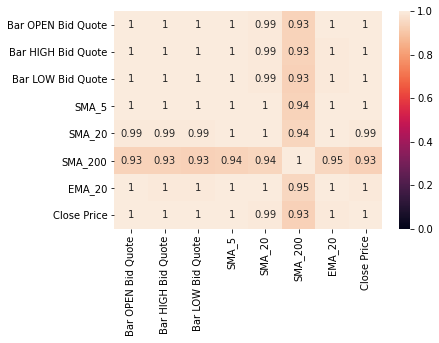

In [142]:
matrix_df = test_df.drop(columns= 'Volume')
cor_matrix = sns.heatmap(matrix_df.corr(), annot= True, vmin= 0, vmax= 1)
cor_matrix

In [144]:
fig = cor_matrix.get_figure()
fig.savefig('../resources/Images/correlation_matrix.png')

The target I chose is the Close Price, so i am going to change this column position to last place before preparing the independent and dependent variables

In [22]:
test_df['Close Price'] = test_df['Bar CLOSE Bid Quote']
test_df = test_df.drop(columns='Bar CLOSE Bid Quote', axis= 1)
test_df = test_df.set_index(test_df['Date'])
test_df

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Volume,SMA_5,SMA_20,SMA_200,EMA_20,Close Price
Date,,,,,,,,,,,
2021.05.18,2021.05.18,13:26,1.22160,1.22162,1.22158,0,1.221588,1.221577,1.221098,1.221588,1.22160
2021.05.18,2021.05.18,13:27,1.22159,1.22162,1.22159,0,1.221592,1.221577,1.221101,1.221590,1.22160
2021.05.18,2021.05.18,13:28,1.22159,1.22159,1.22158,0,1.221594,1.221577,1.221105,1.221590,1.22159
2021.05.18,2021.05.18,13:29,1.22160,1.22163,1.22159,0,1.221602,1.221583,1.221108,1.221593,1.22163
2021.05.18,2021.05.18,13:30,1.22168,1.22173,1.22168,0,1.221630,1.221592,1.221113,1.221606,1.22173
...,...,...,...,...,...,...,...,...,...,...,...
2021.05.31,2021.05.31,19:53,1.22332,1.22332,1.22329,0,1.223316,1.223283,1.222834,1.223276,1.22330
2021.05.31,2021.05.31,19:54,1.22330,1.22330,1.22329,0,1.223316,1.223291,1.222838,1.223277,1.22329
2021.05.31,2021.05.31,19:55,1.22327,1.22331,1.22326,0,1.223308,1.223304,1.222841,1.223279,1.22330


before starting with the first model, let´s create a few lists so that we can store information of all the models. In the end of the notebook we will create a dataframe with these list to have a model comparison

In [111]:
model_name_list = []
parameters = []
scores = []

I make use of my function LSTM_preprocessing to convert data in train and test. I decided to use a step of 60 so that the sliding window will be an hour

In [100]:
x_train, x_test, y_train, y_test = LSTM_preprocessing(test_df, step= 60, train_size= 0.5)

In [101]:
x_train.shape

(6616, 9, 60)

LSTM model training in 100 epochs

In [102]:
model = build_simple_rnn()
model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
207/207 [==============================] - 3s 8ms/step - loss: 0.0522 - mse: 0.0522
Epoch 2/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0084 - mse: 0.0084
Epoch 3/100
207/207 [==============================] - 2s 9ms/step - loss: 0.0052 - mse: 0.0052
Epoch 4/100
207/207 [==============================] - 2s 9ms/step - loss: 0.0035 - mse: 0.0035
Epoch 5/100
207/207 [==============================] - 2s 9ms/step - loss: 0.0027 - mse: 0.0027
Epoch 6/100
207/207 [==============================] - 2s 10ms/step - loss: 0.0022 - mse: 0.0022
Epoch 7/100
207/207 [==============================] - 2s 10ms/step - loss: 0.0019 - mse: 0.0019
Epoch 8/100
207/207 [==============================] - 2s 11ms/step - loss: 0.0017 - mse: 0.0017
Epoch 9/100
207/207 [==============================] - 2s 9ms/step - loss: 0.0014 - mse: 0.0014
Epoch 10/100
207/207 [==============================] - 2s 10ms/step - loss: 0.0013 - mse: 0.0013
Epoch 11/100
207/207 [=============

In [103]:
prediction = model.predict(x_test)

In [104]:
prediction

array([[1.2347026],
       [1.2347109],
       [1.2347023],
       ...,
       [1.2345341],
       [1.2345337],
       [1.2345332]], dtype=float32)

In [105]:
len(x_test)

6617

In [30]:
prediction[0]

array([1.2141678], dtype=float32)

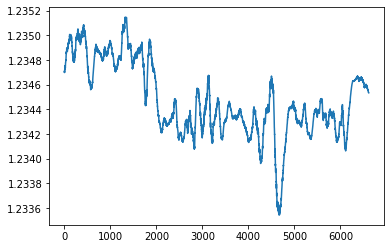

In [107]:
plt.plot(prediction)

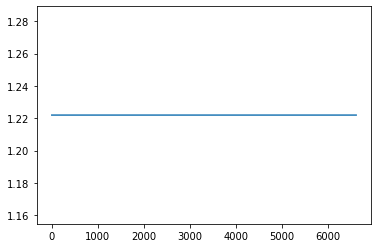

In [32]:
plt.plot(prediction2)

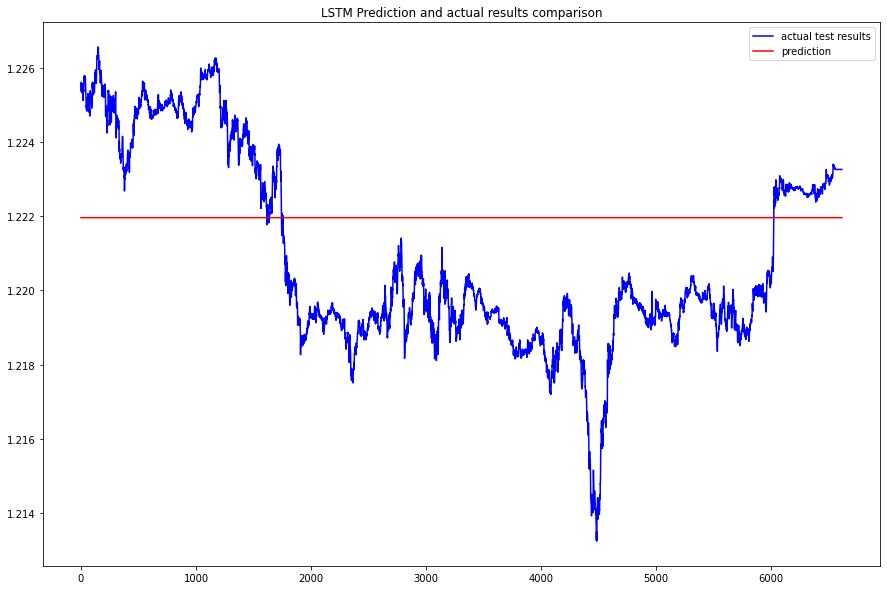

In [33]:
plt.figure(figsize=(15, 10))
plt.plot(y_test, c= 'blue', label= 'actual test results')
plt.plot(prediction2, c= 'red', label= 'prediction')
plt.title('LSTM Prediction and actual results comparison')
plt.legend()
plt.savefig('../resources/Images/LSTM_model2.png')

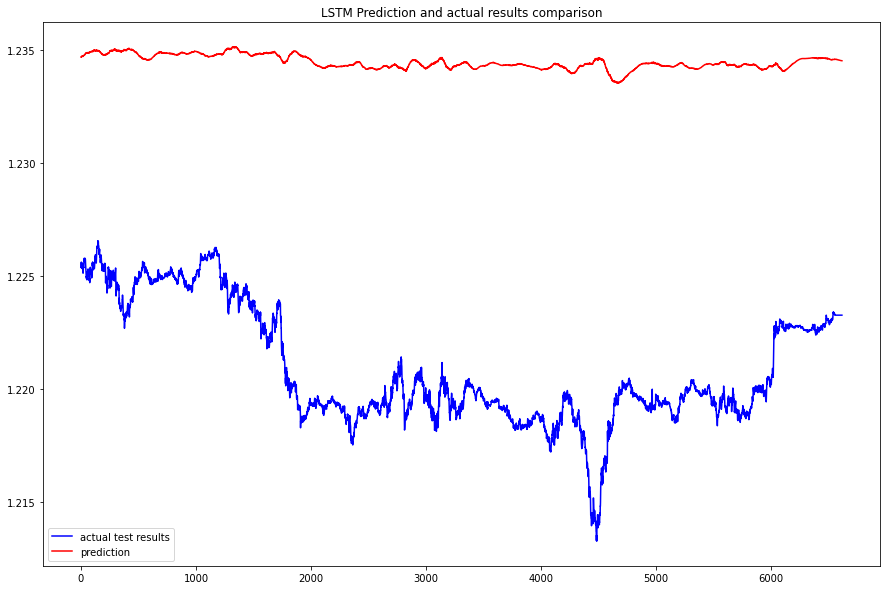

In [108]:
plt.figure(figsize=(15, 10))
plt.plot(y_test, c= 'blue', label= 'actual test results')
plt.plot(prediction, c= 'red', label= 'prediction')
plt.title('LSTM Prediction and actual results comparison')
plt.legend()
plt.savefig('../resources/Images/LSTM_model4.png')
#plt.savefig('../resources/Images/LSTM_model.png')

In [35]:
#model.save('./models/LSTM_model_2.h5')
#model.save_weights('./models/LSTM_weigthd.h5')

In [36]:
LSTM_score = model.evaluate(x_test, y_test)
LSTM_score

207/207 [==============================] - 1s 3ms/step - loss: 5.8610e-05 - mse: 5.8610e-05


[5.8610214182408527e-05, 5.8610214182408527e-05]

In [112]:
model_name_list.append('LSTM')
scores.append(mean_absolute_error(prediction, y_test))
parameters.append('embedding:60, activation: relu, optimizer: Rmsprop, learning_rate: 0.01')

Despite the predicted prices are pretty far from the actual results we can see that the predicted trend was accurate enough

Let´s try a new model with the Linear Regression

In [37]:
test_df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Volume,SMA_5,SMA_20,SMA_200,EMA_20,Close Price
Date,,,,,,,,,,,
2021.05.18,2021.05.18,13:26,1.22160,1.22162,1.22158,0,1.221588,1.221577,1.221098,1.221588,1.22160
2021.05.18,2021.05.18,13:27,1.22159,1.22162,1.22159,0,1.221592,1.221577,1.221101,1.221590,1.22160
2021.05.18,2021.05.18,13:28,1.22159,1.22159,1.22158,0,1.221594,1.221577,1.221105,1.221590,1.22159
2021.05.18,2021.05.18,13:29,1.22160,1.22163,1.22159,0,1.221602,1.221583,1.221108,1.221593,1.22163
2021.05.18,2021.05.18,13:30,1.22168,1.22173,1.22168,0,1.221630,1.221592,1.221113,1.221606,1.22173
...,...,...,...,...,...,...,...,...,...,...,...
2021.05.31,2021.05.31,19:53,1.22332,1.22332,1.22329,0,1.223316,1.223283,1.222834,1.223276,1.22330
2021.05.31,2021.05.31,19:54,1.22330,1.22330,1.22329,0,1.223316,1.223291,1.222838,1.223277,1.22329
2021.05.31,2021.05.31,19:55,1.22327,1.22331,1.22326,0,1.223308,1.223304,1.222841,1.223279,1.22330


In [113]:
x = test_df.iloc[:, 2:-1]
y = test_df['Close Price']

In [114]:
x_train, x_test, y_train, y_test = Time_Series_train_test_split(x, y, validation_size= 0.5)

In [40]:
LR_model = linear_model.LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [41]:
LR_model.score(x_test, y_test)

0.9997301555829616

In [42]:
LR_prediction = LR_model.predict(x_test)

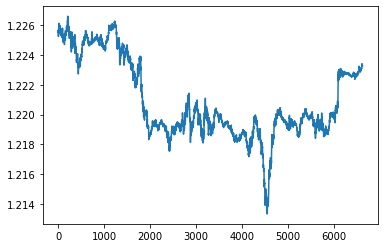

In [43]:
plt.plot(LR_prediction)

In [44]:
y_test

Date
2021.05.25    1.22557
2021.05.25    1.22557
2021.05.25    1.22556
2021.05.25    1.22550
2021.05.25    1.22523
               ...   
2021.05.31    1.22330
2021.05.31    1.22329
2021.05.31    1.22330
2021.05.31    1.22329
2021.05.31    1.22326
Name: Close Price, Length: 6617, dtype: float64

In [45]:
LR_prediction
list_prediction = LR_prediction.tolist()
list_y_test = [x for x in y_test]
list_y_test.pop()
print(len(list_prediction))
print(len(list_y_test))

6617
6616


In [46]:
plot_df = pd.DataFrame(list(zip(list_prediction, list_y_test)), columns= ['Prediction', 'Close Price'] )


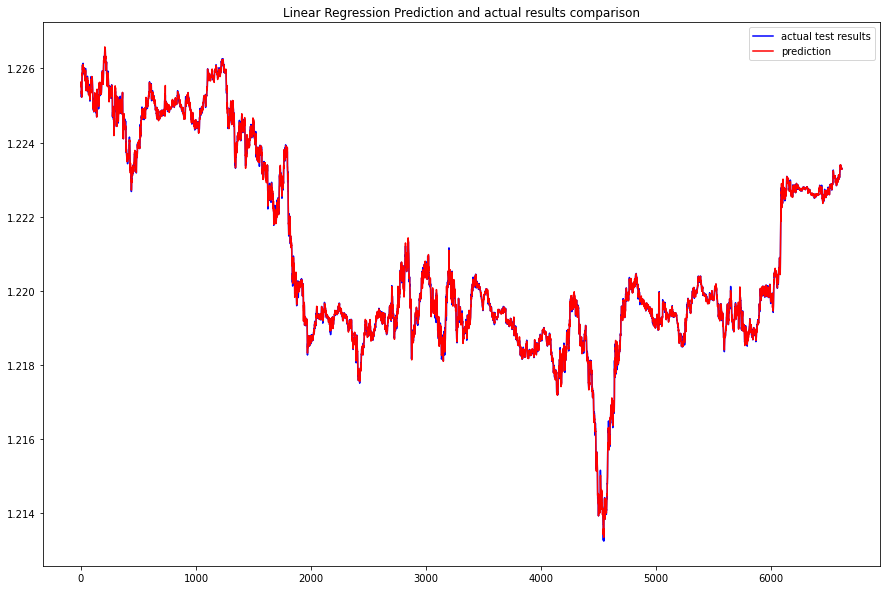

In [47]:
plt.figure(figsize=(15, 10))
plt.plot( plot_df['Close Price'], c= 'blue', label= 'actual test results')
plt.plot( plot_df['Prediction'], c= 'red', label= 'prediction')
plt.title('Linear Regression Prediction and actual results comparison')
plt.legend()
plt.savefig('../resources/Images/Linear_Regression_model.png')

In [115]:
model_name_list.append('Linear Regression')
scores.append(mean_absolute_error(LR_prediction, y_test))
parameters.append('default')

As it can be appreciated in the above plot, predictions made by Linear Regression model fitted very close to the actual Close Prices. However, the model needs present values in orde to predict the prices, which makes impossible to forecast


Now let´s try more timeseries models such as ARIMA

In [48]:
test_df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Volume,SMA_5,SMA_20,SMA_200,EMA_20,Close Price
Date,,,,,,,,,,,
2021.05.18,2021.05.18,13:26,1.22160,1.22162,1.22158,0,1.221588,1.221577,1.221098,1.221588,1.22160
2021.05.18,2021.05.18,13:27,1.22159,1.22162,1.22159,0,1.221592,1.221577,1.221101,1.221590,1.22160
2021.05.18,2021.05.18,13:28,1.22159,1.22159,1.22158,0,1.221594,1.221577,1.221105,1.221590,1.22159
2021.05.18,2021.05.18,13:29,1.22160,1.22163,1.22159,0,1.221602,1.221583,1.221108,1.221593,1.22163
2021.05.18,2021.05.18,13:30,1.22168,1.22173,1.22168,0,1.221630,1.221592,1.221113,1.221606,1.22173
...,...,...,...,...,...,...,...,...,...,...,...
2021.05.31,2021.05.31,19:53,1.22332,1.22332,1.22329,0,1.223316,1.223283,1.222834,1.223276,1.22330
2021.05.31,2021.05.31,19:54,1.22330,1.22330,1.22329,0,1.223316,1.223291,1.222838,1.223277,1.22329
2021.05.31,2021.05.31,19:55,1.22327,1.22331,1.22326,0,1.223308,1.223304,1.222841,1.223279,1.22330


In [49]:
Price_diff = test_df['Close Price'].diff(periods= 4)
Price_diff = Price_diff[20:]

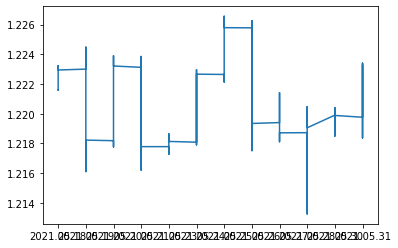

In [50]:
plt.plot(test_df['Close Price'])

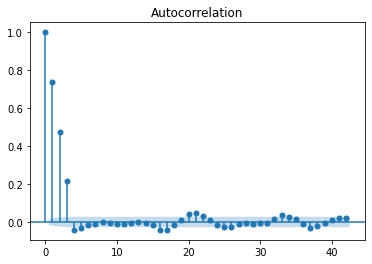

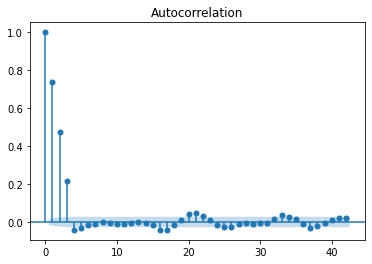

In [51]:
plot_acf(Price_diff)

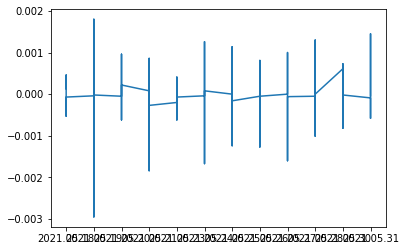

In [52]:
plt.plot(Price_diff)

In [53]:
adfuller(test_df['Close Price'])

(-2.4110953209785206,
 0.13862929352323322,
 37,
 13195,
 {'1%': -3.4308456856843326,
  '5%': -2.861759069428503,
  '10%': -2.566886605750941},
 -202392.12663637678)

In [54]:
best_model = auto_arima(y_train,
                max_p = 5,
                max_q = 5,
                max_d = 3,
                stationary = True,
                trace = True,
                stepwise = True,
                exogenous = x_train.values.reshape(-1,8))



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-113619.377, Time=4.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-113587.982, Time=2.59 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-113607.828, Time=3.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-113605.693, Time=3.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-113313.744, Time=7.75 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-113621.325, Time=3.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-113622.911, Time=3.16 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-113621.308, Time=4.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-113615.980, Time=3.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-113618.725, Time=6.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-113624.911, Time=2.65 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-113607.693, Time=2.79 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-113623.325, Time=3.21 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-113623.309, Time=

In [55]:
tr_len = len(x_train)
te_len = len(x_test)
to_len = len(test_df)

In [56]:
Arima_model = ARIMA(order=(1,0,2))
Arima_model.fit(y_train,
        exogenous=x_train.values.reshape(-1,8))
print(Arima_model.summary()) 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6616
Model:               SARIMAX(1, 0, 2)   Log Likelihood               56823.662
Date:                Sat, 10 Jul 2021   AIC                        -113621.325
Time:                        20:09:48   BIC                        -113532.961
Sample:                             0   HQIC                       -113590.789
                               - 6616                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.474e-10      0.000  -7.49e-07      1.000      -0.001       0.001
x1            -0.6352      0.000  -4630.231      0.000      -0.635      -0.635
x2             0.7826      0.000   6600.534      0.0

In [57]:
x_test.shape

(6617, 8)

In [58]:
arima_prediction = Arima_model.predict(6617 , exogenous= x_test.values.reshape(-1,8))

In [59]:
arima_prediction

array([1.22554599, 1.2256426 , 1.22549943, ..., 1.22329561, 1.22329006,
       1.22325581])

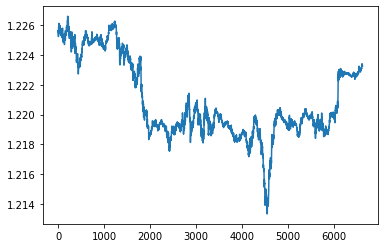

In [60]:
plt.plot(arima_prediction)


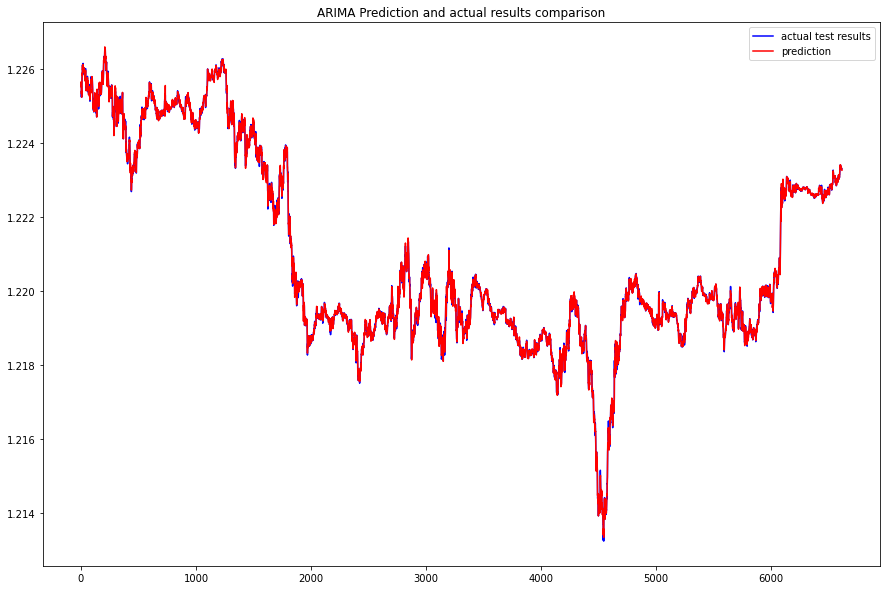

In [61]:
plt.figure(figsize=(15, 10))
plt.plot( plot_df['Close Price'], c= 'blue', label= 'actual test results')
plt.plot( arima_prediction, c= 'red', label= 'prediction')
plt.title('ARIMA Prediction and actual results comparison')
plt.legend()
plt.savefig('../resources/Images/Arima_model.png')

seems that ARIMA model fits perfectly, but when giving the exogenous parameter we need to provide x values of the same minute that the model has to predict, so doesn´t seem it could be a model to put on practice either

In [116]:
model_name_list.append('ARIMA')
scores.append(mean_absolute_error(arima_prediction, y_test))
parameters.append('order= (1,0,2), exog= x_train')

Let´s try now with a CNN now

In [117]:
x_train, x_test, y_train, y_test = LSTM_preprocessing(test_df, step= 60, train_size= 0.5)

In [63]:
x_train.shape

(6616, 9, 60)

In [64]:
x_train.shape

(6616, 9, 60)

In [65]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters= 64, kernel_size = 2, activation = 'relu', input_shape= (9, 60)))
cnn_model.add(MaxPooling1D(pool_size= 2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation = 'relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer = 'adam', loss= 'mse')

In [66]:
x_train.shape

(6616, 9, 60)

In [67]:
x_test.shape

(6617, 9, 60)

In [68]:
x_train[-1][-1]

array([1.22577, 1.22557, 1.22557, 1.22556, 1.2255 , 1.22523, 1.22539,
       1.22523, 1.22547, 1.22563, 1.22577, 1.22588, 1.22588, 1.2259 ,
       1.2261 , 1.22607, 1.2261 , 1.22611, 1.2261 , 1.22614, 1.22592,
       1.22597, 1.22592, 1.22586, 1.22591, 1.22586, 1.22602, 1.2259 ,
       1.22592, 1.22593, 1.22591, 1.22592, 1.22597, 1.22579, 1.22582,
       1.22573, 1.22575, 1.22572, 1.22584, 1.22589, 1.22599, 1.226  ,
       1.22588, 1.22569, 1.22549, 1.22552, 1.22543, 1.22552, 1.22555,
       1.22549, 1.22541, 1.22555, 1.22552, 1.22542, 1.22543, 1.22551,
       1.22559, 1.22579, 1.22563, 1.22554])

In [69]:
cnn_model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
207/207 [==============================] - 1s 2ms/step - loss: 0.0122
Epoch 2/100
207/207 [==============================] - 0s 2ms/step - loss: 2.9821e-07
Epoch 3/100
207/207 [==============================] - 0s 1ms/step - loss: 3.1683e-07
Epoch 4/100
207/207 [==============================] - 0s 2ms/step - loss: 3.5434e-07
Epoch 5/100
207/207 [==============================] - 0s 2ms/step - loss: 3.9345e-07
Epoch 6/100
207/207 [==============================] - 0s 1ms/step - loss: 5.1419e-07
Epoch 7/100
207/207 [==============================] - 0s 1ms/step - loss: 8.2301e-07
Epoch 8/100
207/207 [==============================] - 0s 2ms/step - loss: 9.3920e-06
Epoch 9/100
207/207 [==============================] - 0s 2ms/step - loss: 2.3039e-04
Epoch 10/100
207/207 [==============================] - 0s 1ms/step - loss: 3.3115e-04
Epoch 11/100
207/207 [==============================] - 0s 2ms/step - loss: 1.4981e-04
Epoch 12/100
207/207 [==============================] - 

In [70]:
cnn_predictions = cnn_model.predict(x_test)

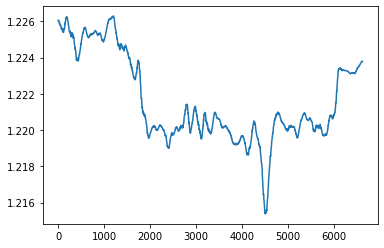

In [71]:
plt.plot(cnn_predictions)

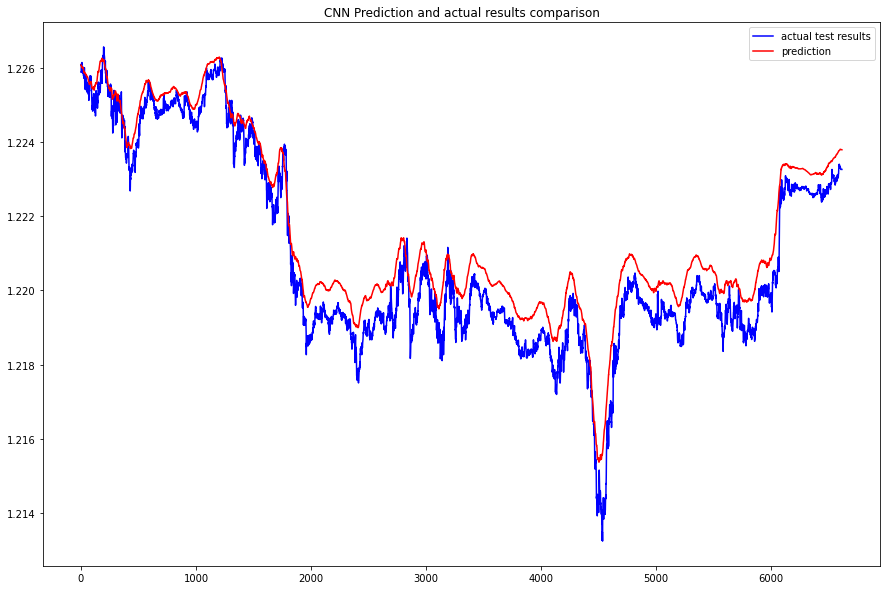

In [146]:
plt.figure(figsize=(15, 10))
plt.plot( y_test, c= 'blue', label= 'actual test results')
plt.plot( cnn_predictions, c= 'red', label= 'prediction')
plt.title('CNN Prediction and actual results comparison')
plt.legend()
plt.savefig('../resources/Images/CNN_model.png')

In [118]:
model_name_list.append('CNN')
scores.append(mean_absolute_error(cnn_predictions, y_test))
parameters.append('epochs: 100, embedding: 60, batch: None')

In [73]:
train_prediction = cnn_model.predict(x_train)

In [74]:
total_y = np.concatenate([y_train, y_test])
total_y

array([[1.22288],
       [1.22289],
       [1.22284],
       ...,
       [1.22326],
       [1.22326],
       [1.22326]])

In [75]:
total_prediction = np.concatenate([train_prediction, cnn_predictions])
total_prediction = total_prediction + 0.0022

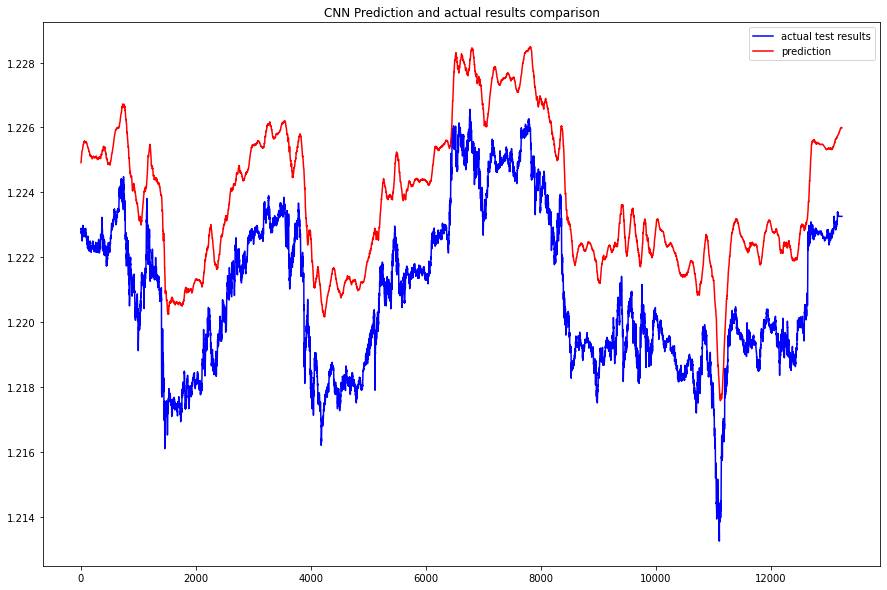

In [76]:
plt.figure(figsize=(15, 10))
plt.plot( total_y, c= 'blue', label= 'actual test results')
plt.plot( total_prediction, c= 'red', label= 'prediction')
plt.title('CNN Prediction and actual results comparison')
plt.legend()
plt.savefig('../resources/Images/CNN_model.png')

In [77]:
cnn_model.save('./models/CNN_model.h5')
cnn_model.save_weights('./models/CNN_weigths.h5')


Seems that CNN are behaving better when forecasting. Let´s try tune the NN to see if we can get even better results 

Let´s start trying different embeddings

In [78]:
embedding_list = [5, 10, 20, 30, 40, 60, 70]
try_embedding(test_df, embedding_list)

207/207 [==============================] - 1s 2ms/step - loss: 0.0455
embedding: 5
error: 7.846293622096169e-08
##########################################
207/207 [==============================] - 1s 2ms/step - loss: 0.0407
embedding: 10
error: 8.265225958825116e-08
##########################################
207/207 [==============================] - 1s 2ms/step - loss: 0.0170
embedding: 20
error: 1.8687284260514066e-07
##########################################
207/207 [==============================] - 1s 2ms/step - loss: 0.0124
embedding: 30
error: 2.854215259056989e-07
##########################################
207/207 [==============================] - 1s 2ms/step - loss: 0.0417
embedding: 40
error: 3.3596471027321634e-07
##########################################
207/207 [==============================] - 1s 2ms/step - loss: 0.0804
embedding: 60
error: 6.282491530387834e-07
##########################################
207/207 [==============================] - 1s 2ms/step - loss: 

Seems that the higher the size of the embedding, the model has a higher error. So we will keep an embedding of 5 as it has the lowest error

Let´s try now with different epochs

In [79]:
epochs = [20, 30, 50, 100, 150]
try_epochs(test_df, epochs)

Epoch 1/20
207/207 [==============================] - 1s 2ms/step - loss: 0.0389
Epoch 2/20
207/207 [==============================] - 0s 2ms/step - loss: 9.7490e-08
Epoch 3/20
207/207 [==============================] - 0s 2ms/step - loss: 9.8516e-08
Epoch 4/20
207/207 [==============================] - 0s 2ms/step - loss: 9.7940e-08
Epoch 5/20
207/207 [==============================] - 0s 2ms/step - loss: 9.8941e-08
Epoch 6/20
207/207 [==============================] - 0s 2ms/step - loss: 9.9601e-08
Epoch 7/20
207/207 [==============================] - 0s 2ms/step - loss: 9.9358e-08
Epoch 8/20
207/207 [==============================] - 0s 2ms/step - loss: 1.0211e-07
Epoch 9/20
207/207 [==============================] - 0s 2ms/step - loss: 1.0259e-07
Epoch 10/20
207/207 [==============================] - 0s 2ms/step - loss: 1.0329e-07
Epoch 11/20
207/207 [==============================] - 0s 2ms/step - loss: 1.0258e-07
Epoch 12/20
207/207 [==============================] - 1s 2ms/step 

In [80]:
batch_list = [20, 50, 100, 200]
try_batch(test_df, batch_list)

331/331 [==============================] - 3s 7ms/step - loss: 0.0150 - mse: 0.0150
embedding: 20
error: 0.0030753906489566336
##########################################
133/133 [==============================] - 2s 9ms/step - loss: 0.0186 - mse: 0.0186
embedding: 50
error: 0.003730068485071885
##########################################
67/67 [==============================] - 2s 12ms/step - loss: 0.0677 - mse: 0.0677
embedding: 100
error: 0.012121080367940393
##########################################
34/34 [==============================] - 2s 20ms/step - loss: 0.0409 - mse: 0.0409
embedding: 200
error: 0.008352421556023963
##########################################


Now let´s train the same module with the parameters that fit better

In [132]:
x_train, x_test, y_train, y_test = LSTM_preprocessing(test_df, step=10, train_size= 0.5)

In [133]:
tuned_CNN = build_CNN_model(embedding= 10)
tuned_CNN.fit(x_train, y_train, batch_size= 10, epochs= 150)

Epoch 1/150
662/662 [==============================] - 2s 1ms/step - loss: 0.0043
Epoch 2/150
662/662 [==============================] - 1s 2ms/step - loss: 1.1361e-07
Epoch 3/150
662/662 [==============================] - 1s 1ms/step - loss: 1.4348e-07
Epoch 4/150
662/662 [==============================] - 1s 2ms/step - loss: 1.9050e-07
Epoch 5/150
662/662 [==============================] - 1s 1ms/step - loss: 2.3399e-07
Epoch 6/150
662/662 [==============================] - 1s 1ms/step - loss: 3.9863e-07
Epoch 7/150
662/662 [==============================] - 1s 1ms/step - loss: 1.5330e-06
Epoch 8/150
662/662 [==============================] - 1s 1ms/step - loss: 1.0412e-05
Epoch 9/150
662/662 [==============================] - 1s 1ms/step - loss: 1.2786e-05
Epoch 10/150
662/662 [==============================] - 1s 2ms/step - loss: 1.2494e-05
Epoch 11/150
662/662 [==============================] - 1s 2ms/step - loss: 1.1401e-05
Epoch 12/150
662/662 [==============================] - 

In [134]:
tuned_prediction = tuned_CNN.predict(x_test)

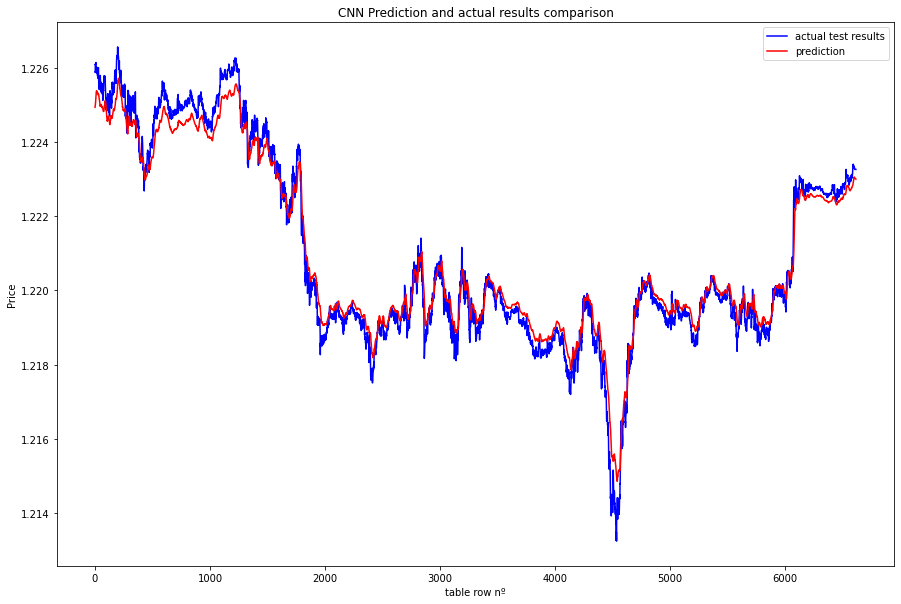

In [135]:
plt.figure(figsize=(15, 10))
plt.plot( y_test, c= 'blue', label= 'actual test results')
plt.plot( tuned_prediction, c= 'red', label= 'prediction')
plt.title('CNN Prediction and actual results comparison')
plt.xlabel('table row nº')
plt.ylabel('Price')
plt.legend()
plt.savefig('../resources/Images/tuned_CNN_model.png')

In [90]:
tuned_CNN.save('./models/tuned_CNN.h5')
tuned_CNN.save_weights('./models/tuned_CNN_weights.h4')

In [119]:
model_name_list.append('tuned CNN')
scores.append(mean_absolute_error(tuned_prediction, y_test))
parameters.append('epochs: 150, embedding: 10, batch:10')

Now we have all our models, lets dispay the dataframe of their info to see a quick comparison

In [121]:
model_comparison = pd.DataFrame({'model':model_name_list, 'mse':scores,  'parameters': parameters})
model_comparison

,model,mse,parameters
0,LSTM,0.013563,"embedding:60, activation: relu, optimizer: Rms..."
1,Linear Regression,0.000031,default
2,ARIMA,0.000031,"order= (1,0,2), exog= x_train"
3,CNN,0.000744,"epochs: 100, embedding: 60, batch: None"
4,tuned CNN,0.000610,"epochs: 150, embedding: 10, batch:10"


Now let´s upload it to the SQL database created for the project

In [122]:
file_name = 'model_comparison.csv'
comp_file_path = test_path + os.sep + file_name

In [124]:
model_comparison.to_csv(comp_file_path, header= True, index= False )

In [129]:
sql_json_readed = read_json('manage_sql.json')
IP_DNS = sql_json_readed["IP_DNS"]
USER = sql_json_readed["USER"]
PASSWORD = sql_json_readed["PASSWORD"]
BD_NAME = sql_json_readed["BD_NAME"]
PORT = sql_json_readed["PORT"]
mysql_db = sql.MySQL(IP_DNS=IP_DNS, USER=USER, PASSWORD=PASSWORD, BD_NAME=BD_NAME, PORT=PORT)
mysql_db.connect()
db_connection_str = mysql_db.SQL_ALCHEMY
db_connection = create_engine(db_connection_str)
file_path = '../data' + os.sep + 'model_comparison.csv'
panda_file = pd.read_csv(file_path)
panda_file.to_sql(name= 'model_comparison', con= db_connection, if_exists= 'replace', index= False)

Connected to MySQL server [16092222l_ds_april_2021_db]


Pie chart

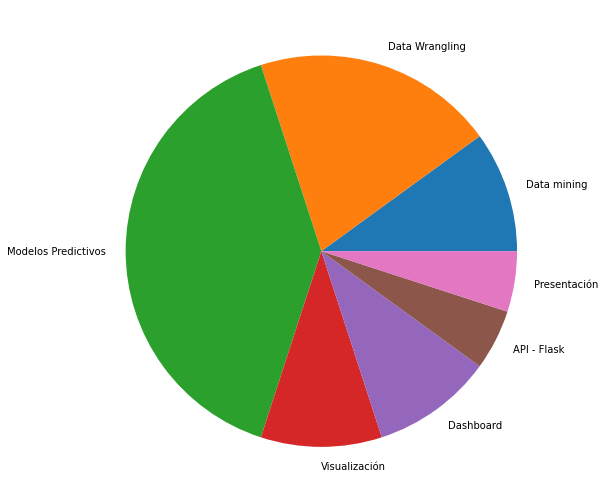

In [161]:
pie_df = pd.read_excel('../data/pie_chart.xlsx')
pie_df.set_index('Tarea', inplace=True)
plt.figure(figsize=(9,9))
plt.pie(pie_df['porcentaje'], labels= pie_df.index);

In [162]:
plt.savefig('../resources/Images/pie_chart.png')

<Figure size 432x288 with 0 Axes>

a. Was it possible to demonstrate the hypothesis? Why? (optional)

    The models prooved to be pretty accurate on predicting test data. However I think more research is needed to conclude that ML can be of use efectively for trading

b. What can you conclude about your data study?

    Models need to be put on practice with a trading bot. It would be interesting to combine the model with another reinforcement learning model in a near future

c. What would you change if you needed to do another DS project?

    I would have started earlier so I could do more research on the subject

d. What do you learn doing this project?

    Above all I have learnt to deal with coding errors. When something doesn´t go as expected I keep calm and debug the problem quicker than before
